In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy

In [2]:
IMAGE_SIZE=256
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
datasets=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/mihir/OneDrive/Documents/DataSets/tomato/tomato_classification",
    shuffle=True,
    image_size=(256,256),
    batch_size=32

)

Found 3000 files belonging to 3 classes.


In [4]:
class_name=datasets.class_names
print(class_name)

['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


In [5]:
len(datasets)

94

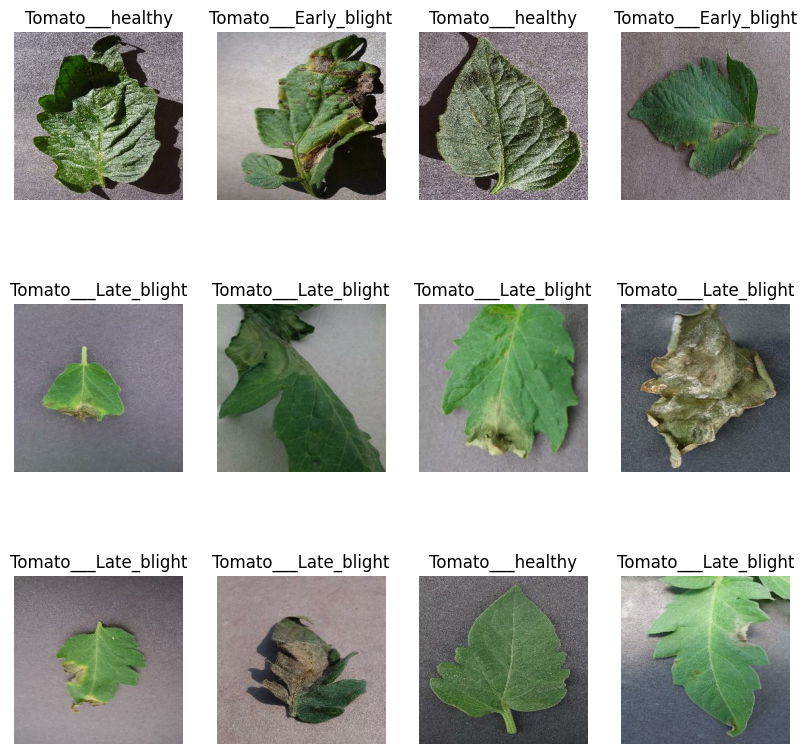

In [6]:
plt.figure(figsize=(10,10))
for batch,label in datasets.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(batch[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")


In [7]:
train_size=0.8
len(datasets)*train_size

75.2

In [8]:
train_data=datasets.take(75)
len(train_data)

test_data=datasets.skip(75)
len(test_data)

19

In [9]:
val_size=0.1
len(datasets)*val_size

9.4

In [10]:
val_data=test_data.take(9)
test_data=test_data.skip(9)
len(test_data)

10

In [11]:
def get_datasets_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int((train_split)*ds_size)
    val_size=int((val_split)*ds_size)
    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)

    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [12]:
train_ds,val_ds,test_ds=get_datasets_partitions_tf(datasets,0.8,0.1,0.1,True,1000)
print(len(train_ds),len(test_ds),len(val_ds))

75 10 9


In [13]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescalling=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    # layers.experimental.preprocessing.A(1.0/255),

])

In [15]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    # layers.experimental.preprocessing.RandomHeight(0.2),
    # layers.experimental.preprocessing.RandomZoom(0.2),
])

In [16]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescalling,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(n_classes,activation="softmax")
])


In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),   metrics=['accuracy'])

In [20]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
 
)

Epoch 1/50


75/75 [==============================] - 138s 2s/step - loss: 0.9588 - accuracy: 0.4987 - val_loss: 0.7445 - val_accuracy: 0.6354
Epoch 2/50
75/75 [==============================] - 117s 2s/step - loss: 0.6108 - accuracy: 0.7366 - val_loss: 0.5207 - val_accuracy: 0.7639
Epoch 3/50
75/75 [==============================] - 117s 2s/step - loss: 0.4320 - accuracy: 0.8106 - val_loss: 0.4160 - val_accuracy: 0.8125
Epoch 4/50
75/75 [==============================] - 119s 2s/step - loss: 0.3615 - accuracy: 0.8374 - val_loss: 0.2942 - val_accuracy: 0.8611
Epoch 5/50
75/75 [==============================] - 114s 2s/step - loss: 0.3530 - accuracy: 0.8462 - val_loss: 0.3424 - val_accuracy: 0.8611
Epoch 6/50
75/75 [==============================] - 115s 2s/step - loss: 0.3333 - accuracy: 0.8541 - val_loss: 0.6087 - val_accuracy: 0.7257
Epoch 7/50
75/75 [==============================] - 113s 2s/step - loss: 0.3676 - accuracy: 0.8432 - val_loss: 0.2997 - val_accuracy: 0.8785
Epoch 8/50
75/75 [======

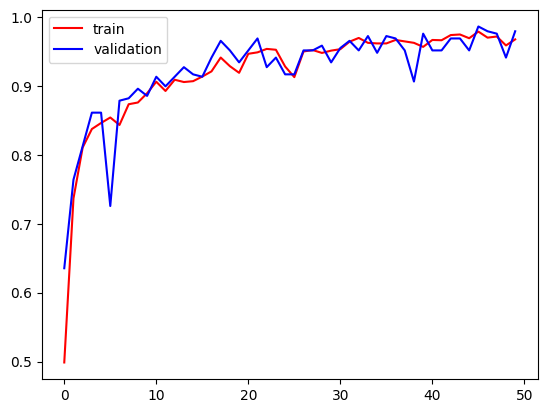

In [22]:
import matplotlib.pylab as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

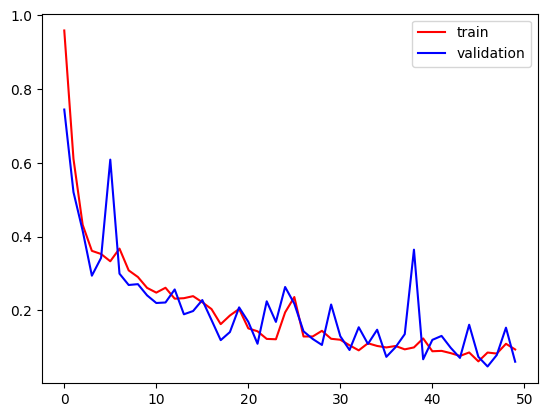

In [21]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [60]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [44]:
test_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

1/1 [==============================] - 0s 286ms/step
Actual label is  Tomato___Late_blight
1
Class name :  Tomato___Late_blight


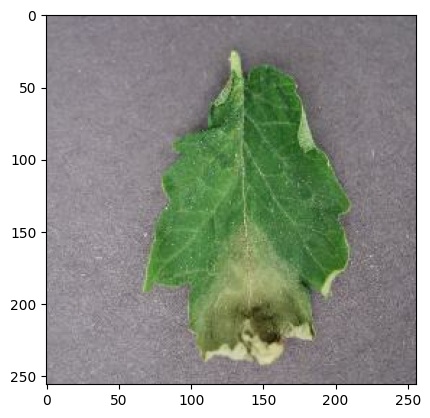

In [42]:
for image_batch,label_batch in test_ds.take(1):
    first_label=label_batch[0].numpy()
    first_image=image_batch[0].numpy().astype('uint8')
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    batch_prediction=model.predict(image_batch)
    print("Actual label is ",class_name[first_label])
    print(numpy.argmax(batch_prediction[0]))
    print('Class name : ',class_name[numpy.argmax(batch_prediction[0])])

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[numpy.argmax(predictions[0])]
    confidence = round(100 * (numpy.max(predictions[0])), 2)
    return predicted_class, confidence

In [49]:
def predict(model, img):
    img_array = tf.expand_dims(img, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[numpy.argmax(predictions[0])]
    confidence = round(100 * (numpy.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 44ms/step


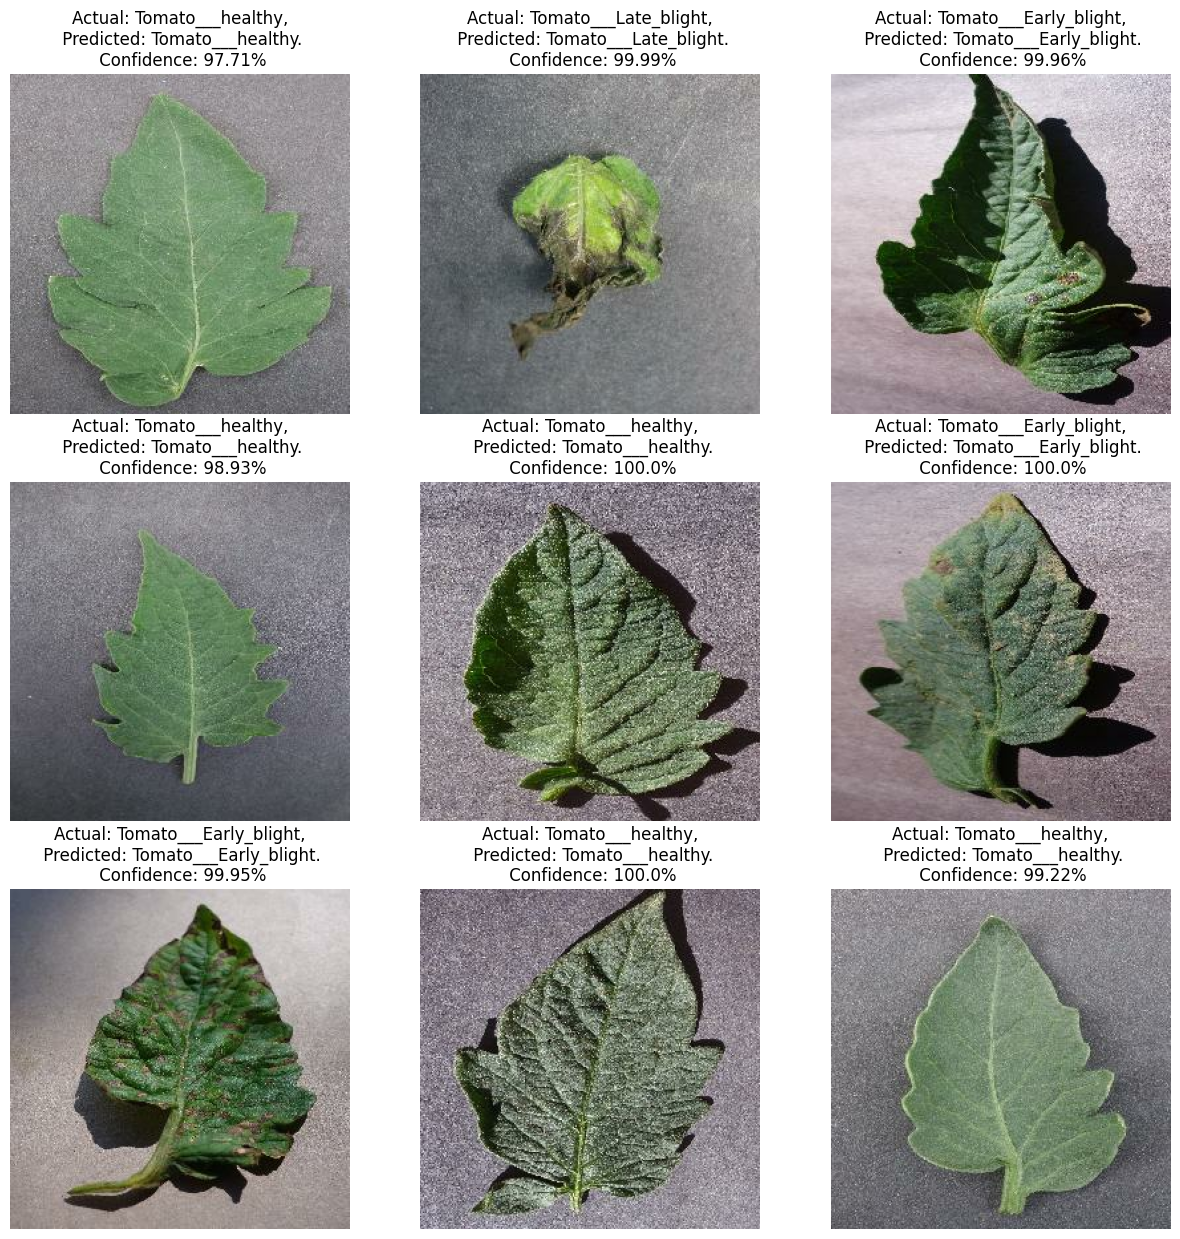

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # plt.imshow(images[i])
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [39]:
# model.save("C:/Users/mihir/OneDrive/Desktop/aliceblue/dl/ml/models")


INFO:tensorflow:Assets written to: C:/Users/mihir/OneDrive/Desktop/aliceblue/dl/ml/models\assets


INFO:tensorflow:Assets written to: C:/Users/mihir/OneDrive/Desktop/aliceblue/dl/ml/models\assets
